**Problem definition**

L'agence **"Santé publique France"** a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. Vous souhaitez y participer et proposer une idée d’application.

**Data**

- https://world.openfoodfacts.org/
- https://world.openfoodfacts.org/data/data-fields.txt


# Data Cleaning

In [1316]:
# Importation des librairies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools
from sklearn.cluster import KMeans
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**DataFrame: Data**

In [1317]:
Data = pd.read_csv('../input/openfoodfacts/fr.openfoodfacts.org.products.csv', sep='\t')

In [1318]:
Data = Data.copy()

In [1319]:
Data.shape

(320772, 162)

In [1320]:
# Affiche tout les colunes dans le df
Data
pd.set_option('max_columns', None)

In [1321]:
Data = Data.dropna(how = 'all', axis = 1)

In [1322]:
Data = Data.drop_duplicates()

In [1323]:
# Selectioner les produits pour la France
fr = []
for i in range(len(Data)):
    if Data.loc[i, 'countries'] == 'France'or Data.loc[i, 'countries'] == 'en:FR':
        fr.append(Data.loc[i, 'countries'])

In [1324]:
Data_fr = Data[Data['countries'].isin(fr)]
pd.set_option('max_columns', None)
Data_fr.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",fr:filet-de-boeuf,Filet-de-boeuf,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [1325]:
len(Data_fr)

94271

In [1326]:
Data_fr['categories_fr'] = np.where((Data_fr['categories_fr'].isnull()==True), "unknown", 
                                 np.where(Data_fr['categories_fr'] == "", "unknown", Data_fr['categories_fr']))
Data_fr['main_category_fr'] = np.where((Data_fr['main_category_fr'].isnull()==True), "unknown", 
                                 np.where(Data_fr['main_category_fr'] == "", "unknown", Data_fr['main_category_fr']))
Data_fr['pnns_groups_1'] = np.where((Data_fr['pnns_groups_1'].isnull()==True), "unknown", 
                                 np.where(Data_fr['pnns_groups_1'] == "", "unknown", Data_fr['pnns_groups_1']))
Data_fr['pnns_groups_2'] = np.where((Data_fr['pnns_groups_2'].isnull()==True), "unknown", 
                                 np.where(Data_fr['pnns_groups_2'] == "", "unknown", Data_fr['pnns_groups_2']))

In [1327]:
for i in Data_fr['pnns_groups_1'].unique():
    print (i)

unknown
Cereals and potatoes
Sugary snacks
Beverages
Fish Meat Eggs
Fruits and vegetables
Composite foods
Salty snacks
Fat and sauces
Milk and dairy products
fruits-and-vegetables
sugary-snacks
cereals-and-potatoes


In [1328]:
Data_fr = Data_fr[~Data_fr.pnns_groups_1.isin(["nan"])]
Data_fr = Data_fr[~Data_fr.pnns_groups_2.isin(["nan"])]

In [1329]:
Data_fr[Data_fr['pnns_groups_1'].str.contains('nan')==False]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",fr:filet-de-boeuf,Filet-de-boeuf,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [1330]:
Data_fr[Data_fr['pnns_groups_2'].str.contains('nan')==False].head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,plastique,plastique,NaN,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",fr:filet-de-boeuf,Filet-de-boeuf,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [1331]:
Data_fr = Data_fr[~((Data_fr['product_name'].isnull()) 
                        & ((Data_fr.pnns_groups_1 == "unknown") 
                           | (Data_fr.main_category_fr == "unknown")))]

In [1332]:
# supprimer les lignes qui contiennent "unknown" pnns_groups_1
# Data_fr[((Data_fr.pnns_groups_1.isin(["unknown"]) & (Data_fr.main_category_fr == "unknown") &
#               (Data_fr.pnns_groups_2 == "unknown") & (Data_fr.main_category_fr == "unknown"))].shape[0]
         
         
Data_fr[((Data_fr.pnns_groups_1 == "unknown") & (Data_fr.main_category_fr == "unknown") &
  (Data_fr.pnns_groups_2 == "unknown") & (Data_fr.main_category_fr == "unknown"))].shape[0]

29079

In [1333]:
# supprimer les lignes qui contiennent "unknown" en pnns_groups_2
# supprimer les lignes qui contiennent "unknown" pnns_groups_1
Data_fr = Data_fr[~Data_fr.pnns_groups_1.isin(["unknown"])]
Data_fr = Data_fr[~Data_fr.pnns_groups_2.isin(["unknown"])]

In [1334]:
# Data_fr = Data_fr[~Data_fr.pnns_groups_1.isin(["nan"])]
# Data_fr = Data_fr[~Data_fr.pnns_groups_2.isin(["nan"])]

In [1335]:
# correct feature names
Data_fr["pnns_groups_1"] = Data_fr["pnns_groups_1"].str.lower().str.replace('-', ' ')
Data_fr['pnns_groups_1'].unique()

array(['cereals and potatoes', 'sugary snacks', 'beverages',
       'fish meat eggs', 'fruits and vegetables', 'composite foods',
       'salty snacks', 'fat and sauces', 'milk and dairy products'],
      dtype=object)

In [1336]:
for i in Data_fr['pnns_groups_2'].unique():
    print (i)

Legumes
Biscuits and cakes
Sweets
Non-sugared beverages
Sweetened beverages
Meat
Soups
Sandwich
Appetizers
Dressings and sauces
Chocolate products
Dried fruits
Nuts
One-dish meals
Cheese
Fruits
Fats
Pizza pies and quiche
Vegetables
Breakfast cereals
Cereals
Fruit juices
vegetables
Ice cream
Milk and yogurt
Bread
Fish and seafood
pastries
Processed meat
Dairy desserts
Artificially sweetened beverages
Fruit nectars
Potatoes
Eggs
Salty and fatty products
fruits
legumes
cereals


On voit ici que certaines catégories sont présentes plusieurs fois mais orthographiées différement :

- 'fruits-and-vegetables' et 'Fruits and vegetables'
- 'vegetables' et 'Vegetables'


Nous allons donc corriger le problème:

In [1337]:
# correct feature names
Data_fr["pnns_groups_2"] = Data_fr["pnns_groups_2"].str.replace('vegetables', 'Vegetables')
Data_fr['pnns_groups_2'].unique()

array(['Legumes', 'Biscuits and cakes', 'Sweets', 'Non-sugared beverages',
       'Sweetened beverages', 'Meat', 'Soups', 'Sandwich', 'Appetizers',
       'Dressings and sauces', 'Chocolate products', 'Dried fruits',
       'Nuts', 'One-dish meals', 'Cheese', 'Fruits', 'Fats',
       'Pizza pies and quiche', 'Vegetables', 'Breakfast cereals',
       'Cereals', 'Fruit juices', 'Ice cream', 'Milk and yogurt', 'Bread',
       'Fish and seafood', 'pastries', 'Processed meat', 'Dairy desserts',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

In [1338]:
Data_fr.isna().mean()

code                                0.000000
url                                 0.000000
creator                             0.000000
created_t                           0.000000
created_datetime                    0.000000
                                      ...   
collagen-meat-protein-ratio_100g    0.996740
cocoa_100g                          0.988449
carbon-footprint_100g               0.996841
nutrition-score-fr_100g             0.239913
nutrition-score-uk_100g             0.239913
Length: 146, dtype: float64

In [1339]:
#Combien des valeur manquants dans notre df
Data_fr.isnull().sum() / len(Data)*100

code                                 0.000000
url                                  0.000000
creator                              0.000000
created_t                            0.000000
created_datetime                     0.000000
                                      ...    
collagen-meat-protein-ratio_100g    15.441186
cocoa_100g                          15.312746
carbon-footprint_100g               15.442744
nutrition-score-fr_100g              3.716659
nutrition-score-uk_100g              3.716659
Length: 146, dtype: float64

In [1340]:
Data_fr.shape

(49693, 146)

In [1341]:
def get_feature_wrt_tr(tr):
    """
    Function that selects features which has 
    fullness rate greater than threshold

    Parameters:
    ----------
    tr: float, fullness rate threshold

    Return:
    ------
    selected_features: pd.Series, selected features pandas series 
    """
    null_values = Data_fr.isna().mean()
    selected_features = null_values[null_values <= tr]
    return selected_features

In [1342]:
get_feature_wrt_tr(0.2)

code                                       0.000000
url                                        0.000000
creator                                    0.000000
created_t                                  0.000000
created_datetime                           0.000000
last_modified_t                            0.000000
last_modified_datetime                     0.000000
product_name                               0.004508
quantity                                   0.051255
packaging                                  0.089147
packaging_tags                             0.089127
brands                                     0.009217
brands_tags                                0.009237
categories                                 0.000000
categories_tags                            0.000000
categories_fr                              0.000000
countries                                  0.000000
countries_tags                             0.000000
countries_fr                               0.000000
ingredients_

In [1343]:
Data_fr=Data_fr.drop(['url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'brands', 'brands_tags', 'categories_tags','countries', 'countries_fr', 'states', 'states_tags', 'states_fr'], axis=1)

In [1344]:
# Data_fr=Data_fr.drop(['url', 'code', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'brands', 'brands_tags', 'categories_tags','countries', 'countries_fr', 'states', 'states_tags', 'states_fr'], axis=1)

In [1345]:
get_feature_wrt_tr(0.4)

code                                       0.000000
product_name                               0.004508
generic_name                               0.378504
quantity                                   0.051255
packaging                                  0.089147
packaging_tags                             0.089127
categories                                 0.000000
categories_fr                              0.000000
purchase_places                            0.298191
stores                                     0.379671
countries_tags                             0.000000
ingredients_text                           0.152597
additives_n                                0.152597
additives                                  0.152738
ingredients_from_palm_oil_n                0.152597
ingredients_that_may_be_from_palm_oil_n    0.152597
nutrition_grade_fr                         0.239913
pnns_groups_1                              0.000000
pnns_groups_2                              0.000000
main_categor

In [1346]:
Data_fr=Data_fr.drop(['categories', 'countries_tags', 'main_category'], axis=1)

In [1347]:
get_feature_wrt_tr(0.45)

code                                       0.000000
product_name                               0.004508
generic_name                               0.378504
quantity                                   0.051255
packaging                                  0.089147
packaging_tags                             0.089127
categories_fr                              0.000000
purchase_places                            0.298191
stores                                     0.379671
ingredients_text                           0.152597
additives_n                                0.152597
additives                                  0.152738
ingredients_from_palm_oil_n                0.152597
ingredients_that_may_be_from_palm_oil_n    0.152597
nutrition_grade_fr                         0.239913
pnns_groups_1                              0.000000
pnns_groups_2                              0.000000
main_category_fr                           0.000000
image_url                                  0.263598
image_small_

In [1348]:
Data_fr=Data_fr.drop(['packaging'], axis=1)

In [1349]:
get_feature_wrt_tr(0.45)

code                                       0.000000
product_name                               0.004508
generic_name                               0.378504
quantity                                   0.051255
packaging_tags                             0.089127
categories_fr                              0.000000
purchase_places                            0.298191
stores                                     0.379671
ingredients_text                           0.152597
additives_n                                0.152597
additives                                  0.152738
ingredients_from_palm_oil_n                0.152597
ingredients_that_may_be_from_palm_oil_n    0.152597
nutrition_grade_fr                         0.239913
pnns_groups_1                              0.000000
pnns_groups_2                              0.000000
main_category_fr                           0.000000
image_url                                  0.263598
image_small_url                            0.263598
energy_100g 

In [1350]:
Data_fr=Data_fr.drop(['nutrition-score-uk_100g'], axis=1)

In [1351]:
Data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49693 entries, 182 to 320765
Columns: 127 entries, code to nutrition-score-fr_100g
dtypes: float64(89), object(38)
memory usage: 48.5+ MB


In [1352]:
Data_fr = Data_fr[['carbohydrates_100g', 'fiber_100g', 'fruits-vegetables-nuts_100g','product_name','quantity','packaging_tags','categories_fr','nutrition_grade_fr','pnns_groups_1','pnns_groups_2','main_category_fr','energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g','sodium_100g', 'nutrition-score-fr_100g']]

In [1353]:
Data_fr.shape

(49693, 18)

In [1354]:
Data_fr

,carbohydrates_100g,fiber_100g,fruits-vegetables-nuts_100g,product_name,quantity,packaging_tags,categories_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
182,NaN,NaN,NaN,lentilles vertes,1 kg,sachet-plastique,"Aliments et boissons à base de végétaux,Alimen...",NaN,cereals and potatoes,Legumes,Aliments et boissons à base de végétaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,NaN,NaN,NaN,Biscuits sablés fourrage au cacao,1 kg,"carton,boite","Snacks sucrés,Biscuits et gâteaux,Biscuits,Sablés",NaN,sugary snacks,Biscuits and cakes,Sablés,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,"46,7 g",carton,"Snacks sucrés,Confiseries,Bonbons",NaN,sugary snacks,Sweets,Bonbons,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,Thé de Noël aromatisé orange-cannelle,75 g,aluminium,"Aliments et boissons à base de végétaux,Boisso...",NaN,beverages,Non-sugared beverages,Thés,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,10.4,0.0,NaN,"Pepsi, Nouveau goût !",15 cl,canette-aluminium,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",e,beverages,Sweetened beverages,Sodas,177.0,0.0,10.4,0.0,0.0254,0.010000,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320751,74.8,5.9,NaN,Tartines craquantes bio au sarrasin,NaN,"boite,carton,sachet,plastique","Aliments et boissons à base de végétaux,Alimen...",a,cereals and potatoes,Bread,Pains,1643.0,0.6,2.6,13.0,0.6800,0.267717,-4.0
320755,NaN,NaN,NaN,NaN,NaN,NaN,"Produits à tartiner,Petit-déjeuners,Produits à...",NaN,sugary snacks,Sweets,Pâtes à tartiner,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320758,NaN,NaN,NaN,Miel de Camargue,250 g,"bocal,verre","Produits à tartiner,Petit-déjeuners,Produits à...",NaN,sugary snacks,Sweets,Produits d'élevages,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,0.5,0.2,NaN,Thé vert Earl grey,50 g,"boite,carton","Aliments et boissons à base de végétaux,Boisso...",c,beverages,Non-sugared beverages,Thés verts,21.0,0.2,0.5,0.5,0.0254,0.010000,2.0


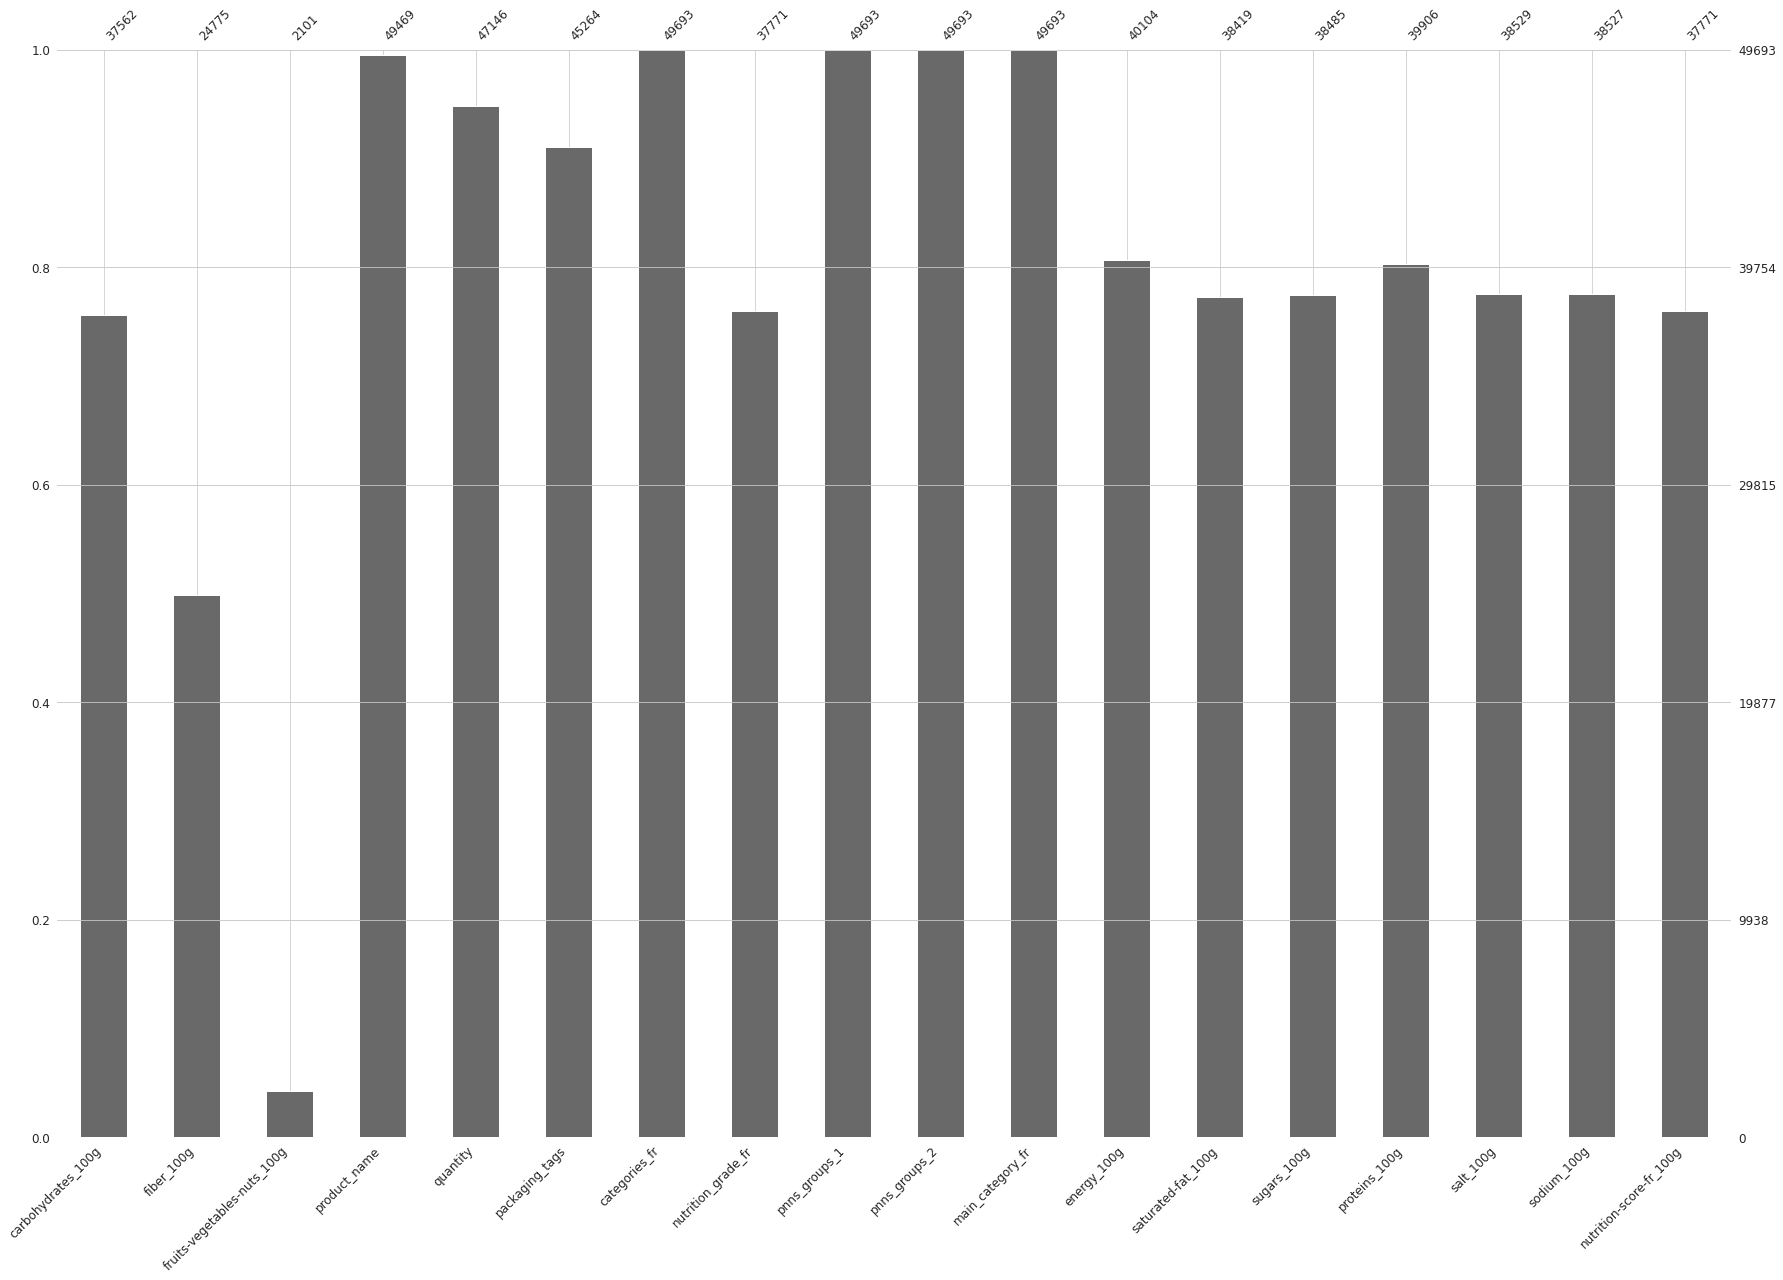

In [1355]:
import missingno as msno

msno.bar(Data_fr, figsize=(30,20), fontsize=12, labels=True);
#msno.matrix(Data, figsize=(40,10), fontsize=18, labels=True)

In [1356]:
Data_fr.shape

(49693, 18)

In [1357]:
Data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49693 entries, 182 to 320765
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   carbohydrates_100g           37562 non-null  float64
 1   fiber_100g                   24775 non-null  float64
 2   fruits-vegetables-nuts_100g  2101 non-null   float64
 3   product_name                 49469 non-null  object 
 4   quantity                     47146 non-null  object 
 5   packaging_tags               45264 non-null  object 
 6   categories_fr                49693 non-null  object 
 7   nutrition_grade_fr           37771 non-null  object 
 8   pnns_groups_1                49693 non-null  object 
 9   pnns_groups_2                49693 non-null  object 
 10  main_category_fr             49693 non-null  object 
 11  energy_100g                  40104 non-null  float64
 12  saturated-fat_100g           38419 non-null  float64
 13  sugars_100g  

In [1358]:
Data_fr.isnull().sum() / len(Data)*100

carbohydrates_100g              3.781814
fiber_100g                      7.768134
fruits-vegetables-nuts_100g    14.836706
product_name                    0.069832
quantity                        0.794022
packaging_tags                  1.380731
categories_fr                   0.000000
nutrition_grade_fr              3.716659
pnns_groups_1                   0.000000
pnns_groups_2                   0.000000
main_category_fr                0.000000
energy_100g                     2.989351
saturated-fat_100g              3.514646
sugars_100g                     3.494071
proteins_100g                   3.051077
salt_100g                       3.480354
sodium_100g                     3.480977
nutrition-score-fr_100g         3.716659
dtype: float64

In [1359]:
Data_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49693 entries, 182 to 320765
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   carbohydrates_100g           37562 non-null  float64
 1   fiber_100g                   24775 non-null  float64
 2   fruits-vegetables-nuts_100g  2101 non-null   float64
 3   product_name                 49469 non-null  object 
 4   quantity                     47146 non-null  object 
 5   packaging_tags               45264 non-null  object 
 6   categories_fr                49693 non-null  object 
 7   nutrition_grade_fr           37771 non-null  object 
 8   pnns_groups_1                49693 non-null  object 
 9   pnns_groups_2                49693 non-null  object 
 10  main_category_fr             49693 non-null  object 
 11  energy_100g                  40104 non-null  float64
 12  saturated-fat_100g           38419 non-null  float64
 13  sugars_100g  

# Valeurs manquantes ou aberrantes

In [1360]:
# remplacer les categorical NAN par la mediane 
categorical_features = list(Data_fr.select_dtypes(include=[object]).columns)
categorical_features

for col in categorical_features:
    Data_fr[col].fillna(Data_fr[col].mode()[0], inplace=True)

In [1361]:
Data_fr.describe()

,carbohydrates_100g,fiber_100g,fruits-vegetables-nuts_100g,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,37562.000000,24775.000000,2101.000000,40104.000000,38419.000000,38485.000000,39906.000000,38529.000000,38527.000000,37771.000000
mean,26.814572,2.560032,39.218001,1081.844878,5.295938,12.577069,7.692452,0.881023,0.346876,8.266077
std,27.291814,3.676652,30.637054,797.683603,8.386928,18.397312,7.411182,1.817336,0.715321,9.045316
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,-15.000000
25%,3.700000,0.300000,10.000000,391.000000,0.250000,1.000000,1.500000,0.066040,0.026100,1.000000
50%,13.300000,1.600000,40.000000,980.000000,1.800000,3.800000,6.000000,0.580000,0.228346,8.000000
75%,52.400000,3.400000,60.000000,1621.000000,7.200000,15.000000,11.000000,1.219200,0.480000,15.000000
max,190.000000,86.200000,100.000000,18700.000000,210.000000,105.000000,86.000000,211.000000,83.000000,40.000000


In [1362]:
Data_fr.shape

(49693, 18)

In [1363]:
# Seleccioner les parametres numeriques 
numerical_features = list(Data_fr.select_dtypes(include=["float64","int64"]).columns)

#On supprime les nutriscores qui eux peuvent être négatifs
numerical_features.remove('nutrition-score-fr_100g')

In [1364]:
datas_cleaned = Data_fr[~((Data_fr.product_name.isnull()) 
                        & ((Data_fr.pnns_groups_1 == "unknown") 
                           | (Data_fr.main_category_fr == "unknown")))]

In [1365]:
datas_cleaned.shape

(49693, 18)

In [1366]:
#Supprime les lignes dont toutes les numerical_features sont à 0 ou nulles
datas_cleaned = datas_cleaned.loc[~((datas_cleaned[numerical_features]==0) | (datas_cleaned[numerical_features].isnull())).all(axis=1)]
datas_cleaned.shape

(40311, 18)

In [1367]:
#On supprime les lignes contenant des valeurs négatives et des max aberrants
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features] < 0).any(axis=1)]
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features].isin([999999,9999999])).any(axis=1)]

In [1368]:
g_100g_features = ['carbohydrates_100g','fiber_100g','fruits-vegetables-nuts_100g','energy_100g','saturated-fat_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g','nutrition-score-fr_100g']

datas_cleaned = datas_cleaned[~(datas_cleaned[g_100g_features] > 100).any(axis=1)]

valeurs de sodium_100g qui ne peuvent pas être supérieurs à salt_100g

In [1369]:
datas_cleaned = datas_cleaned[~(datas_cleaned['sodium_100g'] > datas_cleaned['salt_100g'])]

Densité d'energie maximales pour 100g sont de 3700 kJ/100g (source Wikipedia)

In [1370]:
datas_cleaned = datas_cleaned[~(datas_cleaned['energy_100g'] > 3700)]

In [1371]:
datas_cleaned.shape

(1764, 18)

In [1372]:
datas_cleaned.describe()

,carbohydrates_100g,fiber_100g,fruits-vegetables-nuts_100g,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,1380.000000,1049.000000,198.000000,1509.000000,1392.000000,1469.000000,1521.000000,1495.000000,1494.000000,1332.000000
mean,2.647152,0.989899,43.649495,53.766772,0.210709,3.893436,0.992761,0.387443,0.152610,0.131381
std,6.561278,1.195807,29.503837,34.893891,1.574758,11.881980,1.994765,0.962007,0.378856,4.399646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000
25%,0.500000,0.000000,18.000000,17.000000,0.000000,0.200000,0.000000,0.007620,0.003000,-4.000000
50%,1.500000,0.700000,50.000000,63.000000,0.000000,0.800000,0.500000,0.040000,0.015748,1.000000
75%,3.000000,1.900000,60.000000,83.000000,0.100000,2.700000,1.300000,0.594720,0.235071,2.000000
max,100.000000,18.000000,100.000000,100.000000,24.000000,100.000000,27.500000,18.000000,7.086614,20.000000


Il est important de standardiser les échantillons avant le test, sinon une distribution normale avec une moyenne et/ou une variation différente échouera

In [1373]:
# Normalisation de donnes 
def norm_to_zero_one(datas_cleaned):
    return (datas_cleaned - datas_cleaned.min()) * 1.0 / (datas_cleaned.max() - datas_cleaned.min())

In [1374]:
# df normalise with NaN

datas = numeric_data = datas_cleaned.select_dtypes(include=[np.number]).apply(norm_to_zero_one)
categorical_data = datas_cleaned.select_dtypes(exclude=[np.number])

In [1375]:
datas_cleaned = pd.merge(categorical_data, datas, left_index=True, right_index=True)

product_name                      0
quantity                          0
packaging_tags                    0
categories_fr                     0
nutrition_grade_fr                0
pnns_groups_1                     0
pnns_groups_2                     0
main_category_fr                  0
carbohydrates_100g              384
fiber_100g                      715
fruits-vegetables-nuts_100g    1566
energy_100g                     255
saturated-fat_100g              372
sugars_100g                     295
proteins_100g                   243
salt_100g                       269
sodium_100g                     270
nutrition-score-fr_100g         432
dtype: int64

Ont va regarder si la distribuition sui une loi normale, ce que nous aiderai a prendre une decision relativement a methode d'impotation des valeurs manquantes. 

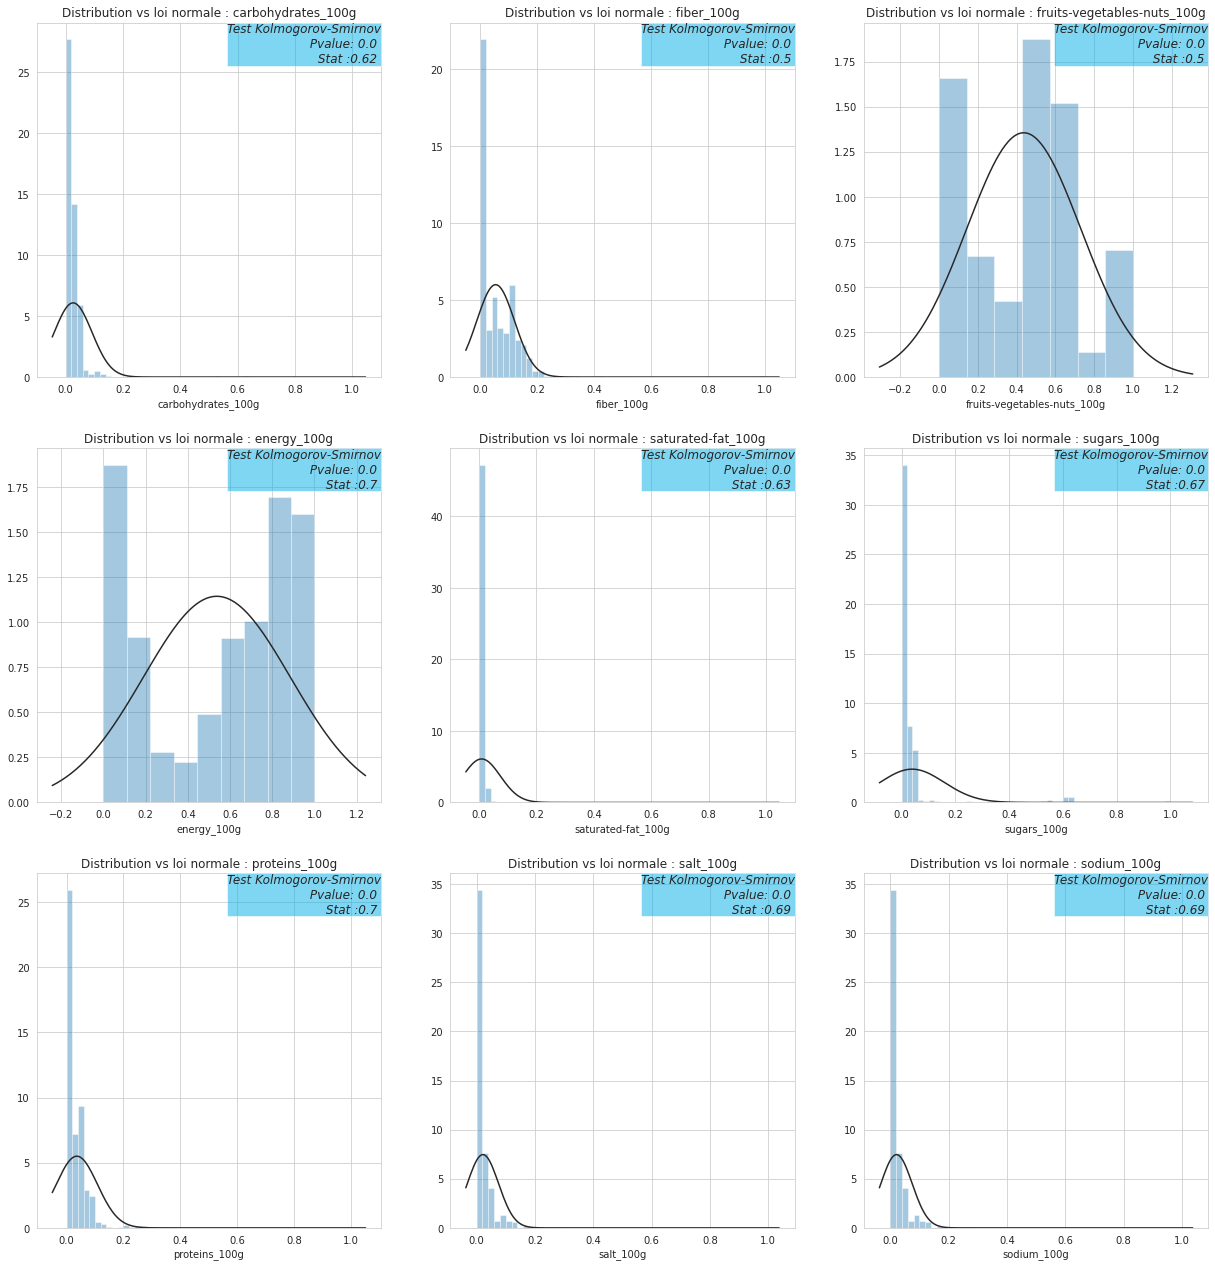

In [1376]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features[i]
    kstest = stats.kstest(datas_cleaned[colonne].notnull(),'norm', mode='asymp')
    ax = sns.distplot(datas_cleaned[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov\n Pvalue: {:.2} \n Stat :{:.2} '.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()

En se basant sur les projections obtenus et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) on rejette donc l'hypothèse de normalité des distributions de ces variables. Il serait donc inexacte d'imputer les valeurs manquantes par la moyenne.
Pour toute les distribuitions que ne suivent pas la loi gaussiene, nous allons imputer avec l'algorithme des K Nearest Neighbours (KNN).

Valeurs Manquantes 

In [1377]:
datas_cleaned[numerical_features].isnull().sum().sort_values(ascending=False)

fruits-vegetables-nuts_100g    1566
fiber_100g                      715
carbohydrates_100g              384
saturated-fat_100g              372
sugars_100g                     295
sodium_100g                     270
salt_100g                       269
energy_100g                     255
proteins_100g                   243
dtype: int64

In [1378]:
datas_cleaned[numerical_features].shape

(1764, 9)

In [1379]:
datas_cleaned[numerical_features].dropna(axis=0, how="all")

,carbohydrates_100g,fiber_100g,fruits-vegetables-nuts_100g,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
20776,0.030,0.050000,NaN,0.880,0.000000,0.000,0.043636,0.005556,0.005556
20832,0.034,0.044444,NaN,0.210,0.000000,0.031,0.043636,0.005556,0.005556
20834,0.030,0.044444,NaN,0.800,0.000000,0.030,0.040000,0.007222,0.007222
27150,0.015,NaN,0.0,0.420,0.000000,0.015,0.000000,0.002222,0.002222
36080,0.008,0.005556,NaN,0.290,0.004167,0.008,0.003636,0.002778,0.002778
...,...,...,...,...,...,...,...,...,...
318340,0.000,0.000000,NaN,0.018,0.000000,0.000,0.000000,0.003333,0.003333
318360,NaN,0.000000,NaN,0.840,0.000000,0.046,0.000000,0.000000,0.000000
318393,NaN,0.000000,NaN,0.790,0.000000,0.044,0.000000,0.034444,0.034444
318394,NaN,0.000000,NaN,0.790,0.000000,0.045,0.000000,0.002778,0.002778


In [1380]:
datas_cleaned[numerical_features].isnull().sum().sort_values(ascending=False)

fruits-vegetables-nuts_100g    1566
fiber_100g                      715
carbohydrates_100g              384
saturated-fat_100g              372
sugars_100g                     295
sodium_100g                     270
salt_100g                       269
energy_100g                     255
proteins_100g                   243
dtype: int64

In [1381]:
# KNN pour les autres variables
from sklearn.impute import KNNImputer

# On entraine le modèle d'imputation sur un échantillon de données
knn_features = ['carbohydrates_100g','sodium_100g','saturated-fat_100g','fiber_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g', 'salt_100g','energy_100g','proteins_100g', 'sugars_100g']
sample_datas = datas_cleaned[knn_features].sample(frac=0.80, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sample_datas)

KNNImputer()

In [1382]:
# Puis on applique le modèle sur l'ensemble des données
datas_imputed = imputer.transform(datas_cleaned[knn_features])
df_datas_imputed = pd.DataFrame(datas_imputed, columns=knn_features)

In [1383]:
for col_knn in knn_features:
    datas_cleaned[col_knn] = df_datas_imputed[col_knn].values

In [1384]:
# datas_cleaned.iloc[np.where(datas_cleaned['energy_100g'].isnull())[0]]

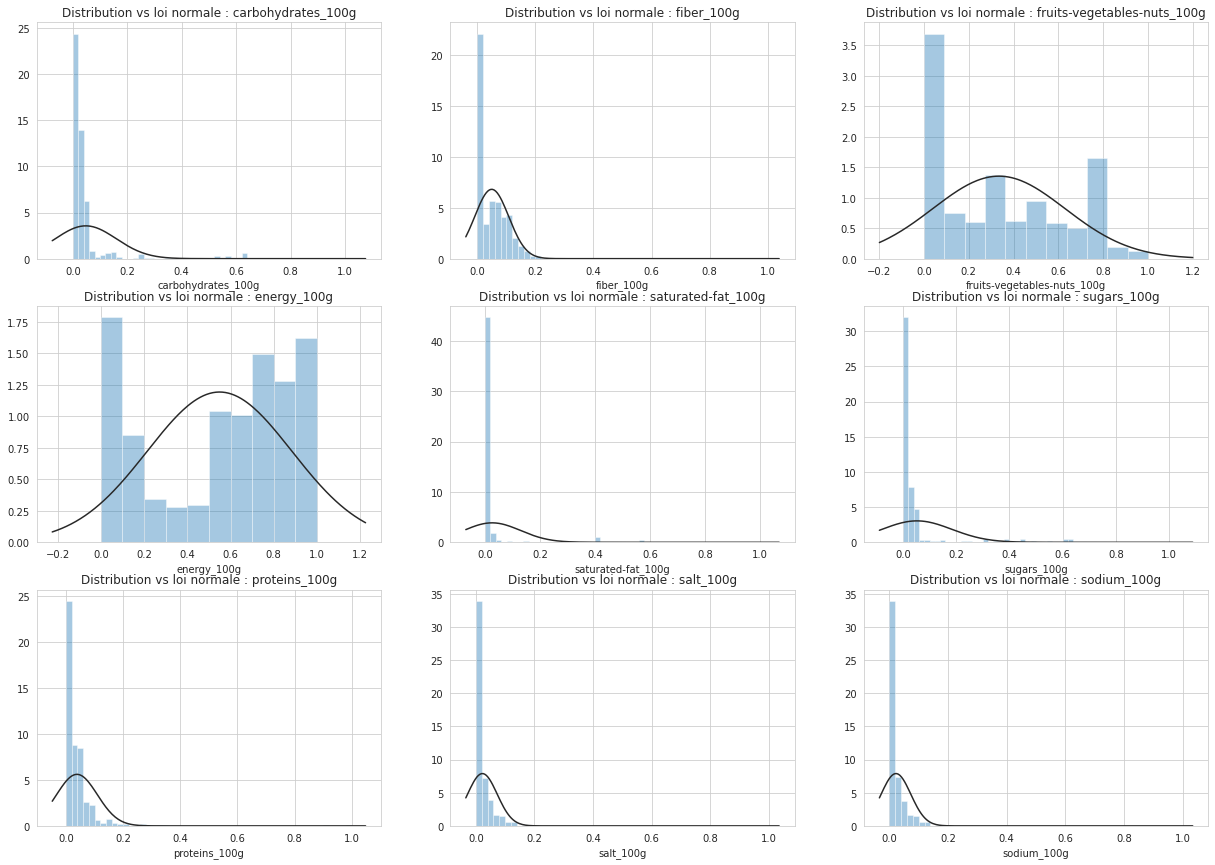

In [1385]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,20))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(4,3,i+1)
    colonne = numerical_features[i]
    kstest = stats.kstest(datas_cleaned[colonne].notnull(),'norm')
    ax = sns.distplot(datas_cleaned[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    sub += 1
plt.show()

La distribuition n'ai pas change apres l'imputation

In [1386]:
datas_cleaned.isnull().sum().sort_values(ascending=False)

product_name                   0
quantity                       0
sodium_100g                    0
salt_100g                      0
proteins_100g                  0
sugars_100g                    0
saturated-fat_100g             0
energy_100g                    0
fruits-vegetables-nuts_100g    0
fiber_100g                     0
carbohydrates_100g             0
main_category_fr               0
pnns_groups_2                  0
pnns_groups_1                  0
nutrition_grade_fr             0
categories_fr                  0
packaging_tags                 0
nutrition-score-fr_100g        0
dtype: int64

Nous avons tout les donnes reemplis apres l'application de knn imputer 

In [1387]:
datas_cleaned.shape

(1764, 18)

In [1388]:
datas_cleaned.to_parquet('datas_cleaned.parquet.gzip',compression='gzip')